In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io

np.random.seed(17)

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

c:\users\hasee\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


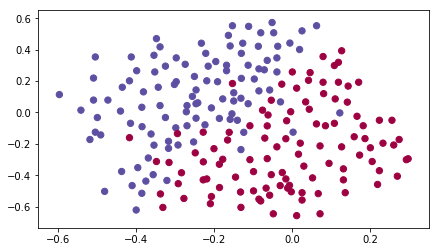

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()
train_X = np.swapaxes(train_X,0,1)
train_Y = np.swapaxes(train_Y,0,1)
test_X = np.swapaxes(test_X,0,1)
test_Y = np.swapaxes(test_Y,0,1)

# Build model

In [3]:
def build_model(l2_reg=0, dropout_rate=0):
    model = Sequential()
    model.add(Dense(20, input_dim=2, activation='relu'))
    if dropout_rate>0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(40, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    if dropout_rate>0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(40, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

## Helper function to plot model training acc/loss curve and decision boundary

In [4]:
import matplotlib.pyplot as plt

def plot_history(history, extra_label=""):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, '-', label='Training acc', color='m')
    plt.plot(epochs, val_acc, '-', label='Validation acc', color='g')

    plt.plot(epochs, loss, '-', label='Training loss', color='y')
    plt.plot(epochs, val_loss, '-', label='Validation loss', color='b')
    plt.legend()
    plt.title('Training and validation accuracy- {}'.format(extra_label))
    plt.show()
    print("train acc:{:.3f}, val acc: {:.3f}".format(acc[-1], val_acc[-1]))


def plot_decision_boundary(X, y, model, label, steps=1000):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """   
    plt.title(label)
    axes = plt.gca()
    axes.set_xlim([-0.75,0.40])
    axes.set_ylim([-0.75,0.65])
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 200
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)    
    plt.ylabel('y')
    plt.xlabel('x')
    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=plt.cm.Spectral)
    plt.show()

In [5]:
def train_visualize_model(l2_reg=0, dropout_rate=0, label=None):
    model = build_model(l2_reg, dropout_rate)
    history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y),
          batch_size=1000, epochs=1000, verbose=0)
    plot_history(history, extra_label=label)
    plot_decision_boundary(train_X, train_Y, model, label)

### Model without weight regularization or dropout

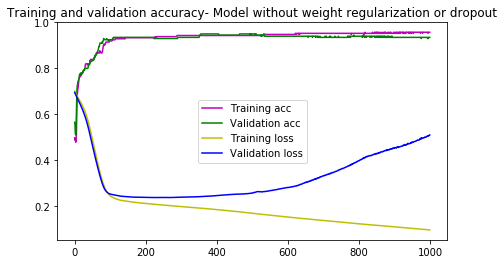

train acc:0.957, val acc: 0.935


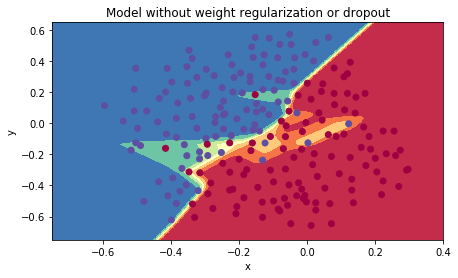

In [6]:
label = "Model without weight regularization or dropout"
train_visualize_model(label=label)

### Model With L2 weight regularization

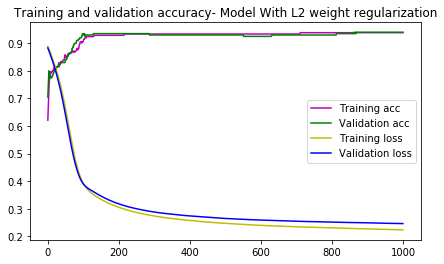

train acc:0.938, val acc: 0.940


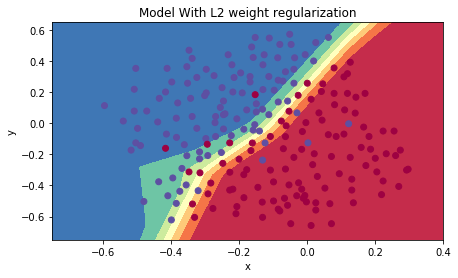

In [7]:
label = "Model With L2 weight regularization"
train_visualize_model(label=label, l2_reg=0.003)

### Model With dropout

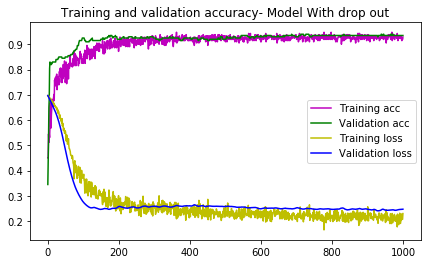

train acc:0.929, val acc: 0.935


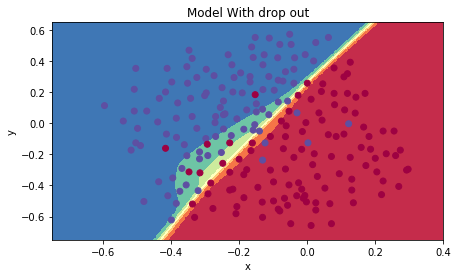

In [8]:
label = "Model With drop out"
train_visualize_model(label=label, dropout_rate= 0.5)